In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from scipy.special import (boxcox ,inv_boxcox)
from scipy import stats
#from sklearn.model_selection import (train_test_split, KFold, cross_val_predict)
#from sklearn.linear_model import Lasso, Ridge

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [4]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [5]:
X_train = train.drop("SalePrice", axis = 1)
Y_train = train["SalePrice"]

In [6]:
X_test = test.drop("SalePrice", axis = 1)
Y_test = test["SalePrice"]

In [7]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1820,1,240,1026,1133,2,8,1925,1950
1,7,1646,1,240,918,918,2,7,1941,1950
2,5,1316,2,484,926,926,1,6,1929,2001
3,10,2402,3,672,3094,2402,2,10,2008,2008
4,7,1253,2,402,1237,1253,2,6,1995,1996
...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978
1164,7,1472,2,402,384,802,2,7,1991,1992
1165,5,789,1,250,789,789,1,5,1948,1950
1166,6,1661,1,377,992,1661,1,8,1955,1996


In [8]:
Y_train

0       184000
1       164000
2       130000
3       555000
4       176000
         ...  
1163    149500
1164    160000
1165    115000
1166    165500
1167    180500
Name: SalePrice, Length: 1168, dtype: int64

In [9]:
bc_result = stats.boxcox(Y_train)
y_train_bc = bc_result[0]
lam = bc_result[1]

In [10]:
y_train_bc

array([6.49259219, 6.46437722, 6.40624351, ..., 6.37492596, 6.46662352,
       6.48790939])

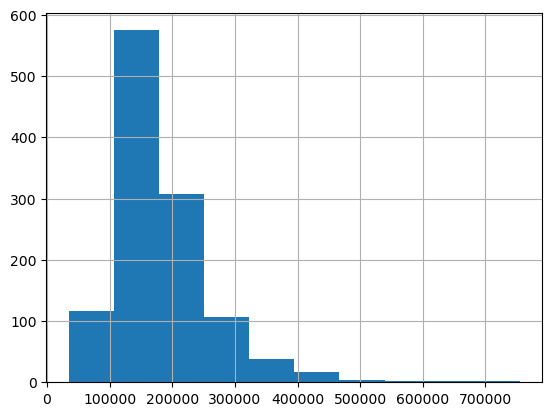

In [11]:
Y_train.hist();

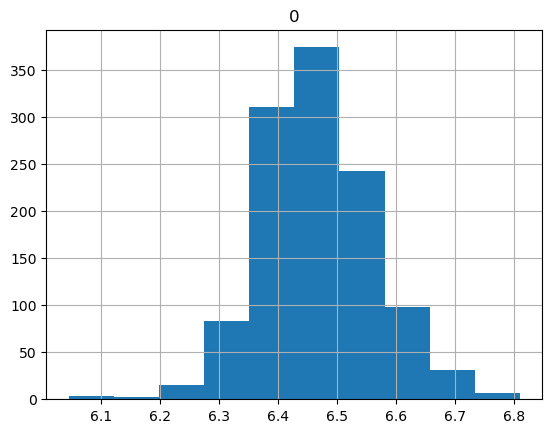

In [12]:
pd.DataFrame(y_train_bc).hist();

In [13]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.fit_transform(X_test)

In [14]:
X_train_s

array([[ 0.65669017,  0.56985198, -1.04528346, ...,  0.92852386,
        -1.51571947, -1.67745507],
       [ 0.65669017,  0.23765885, -1.04528346, ...,  0.29725735,
        -0.98871868, -1.67745507],
       [-0.81127943, -0.3923626 ,  0.30376746, ..., -0.33400916,
        -1.38396928,  0.78721474],
       ...,
       [-0.81127943, -1.39848776, -1.04528346, ..., -0.96527568,
        -0.75815584, -1.67745507],
       [-0.07729463,  0.26629619, -1.04528346, ...,  0.92852386,
        -0.52759299,  0.54558045],
       [ 0.65669017, -0.15180895,  0.30376746, ..., -0.96527568,
         0.62522124,  0.25561929]])

In [15]:
X_test_s

array([[ 1.31834832,  0.9022699 ,  1.64321655, ...,  0.85919977,
         1.14386966,  1.00514251],
       [-0.05160794,  0.26525808, -0.9574297 , ..., -0.26585105,
        -0.483793  ,  0.12316771],
       [ 0.63337019, -0.50556391,  0.34289343, ..., -1.39090187,
         1.10996002,  0.95614391],
       ...,
       [-0.05160794, -1.21230779,  0.34289343, ..., -1.39090187,
         1.04214074,  0.85814671],
       [ 0.63337019, -0.42452394,  0.34289343, ..., -0.26585105,
         1.1777793 ,  1.0541411 ],
       [-0.05160794, -0.01367017,  0.34289343, ...,  0.85919977,
         1.10996002,  1.0541411 ]])

In [16]:
lr = LinearRegression()
lr.fit(X_train_s, y_train_bc)
y_pred_bc = lr.predict(X_test_s)

In [17]:
y_pred = inv_boxcox(y_pred_bc, lam)

In [18]:
print("r2 score for test data:",r2_score(Y_test,y_pred))

r2 score for test data: 0.8616140641678879


Checking the R squared, the coefficient of determination, which is the proportion of the variation in the dependent variable that is predictable from the independent variables. The closer is R squared to 1, the better is the fit of the model.

The `r2_score` method returns the same statistic, also known as the goodness of fit of the model.